# This notebook is a cheatsheet for quick visualization methods

## Imports

In [7]:
import math
import pandas as pd
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

## Example data

In [51]:
df=pd.read_csv("data.csv")

In [52]:
df.head()

,Customer ID,ZIP_CODE,Number of Visits,CC_CARD,GMPCNT,CLUSTYPE,Tot_Spend,Sales per Visit
0,9961,1001,2,0,0.60,10,368.46,184.23
1,9962,1028,4,1,0.54,10,258.00,64.50
2,9963,1056,2,0,0.62,16,77.00,38.50
3,9964,1118,8,1,0.43,10,846.06,105.76
4,9965,1107,1,0,0.22,20,87.44,87.44


### Correlation Matrix

In [21]:
def corr_matrix(df):
    f = plt.figure(figsize=(8, 8))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.title('Correlation Matrix', fontsize=16);

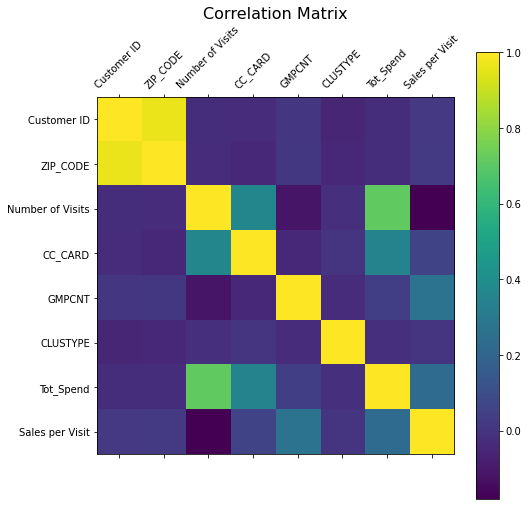

In [22]:
corr_matrix(df)

## Mulitple histogram for pandas df

In [40]:
def multiple_hist(df):
    import math
    # collect variable names
    vnames = df.columns
    vcount = len(vnames)

    # determine required rows and columns for visualizations
    column_count = 3 
    row_count = math.ceil(vcount / column_count)

    # configure figure layout
    fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 8, row_count * 5))

    # visualize distribution of each variable
    for k in range(0, vcount):

        # determine row & col position
        col = k % column_count
        row = int(k / column_count)

        # set figure at row & col position
        ax[row][col].hist(df[vnames[k]], rwidth=0.95, bins=100) # histogram
        #ax[row][col].set_xlim(-1,1) # uncomment if you want to set the xscale to a fixed range
        ax[row][col].set_ylim(0,df.shape[0]) # set y 
        ax[row][col].text(x=0.1, y=df.shape[0]-100, s=vnames[k], fontsize=20, ha='left', va='top') # feature name in chart

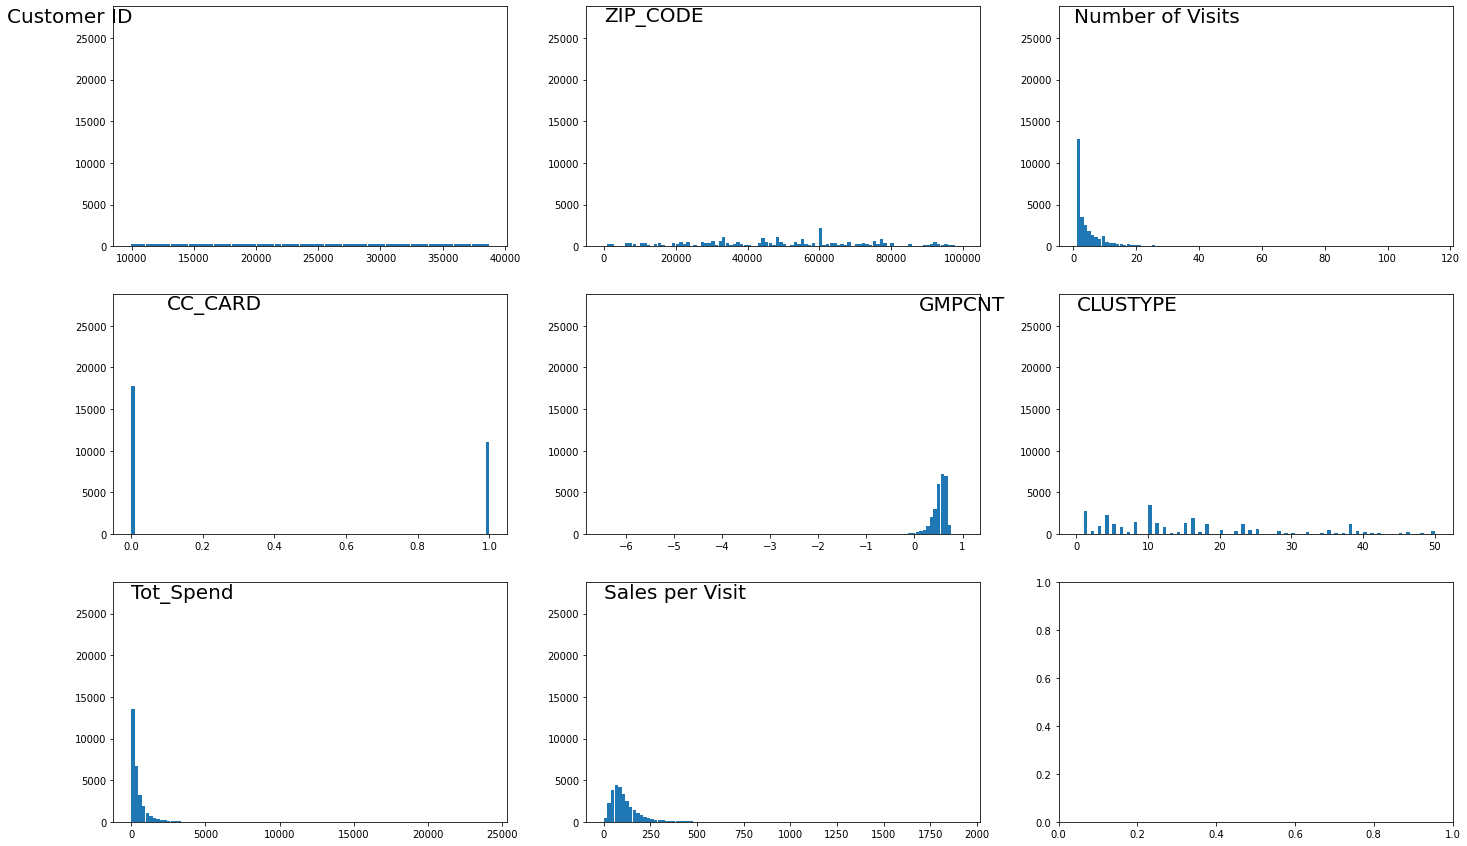

In [41]:
multiple_hist(df)

## Scatter plots for a df

In [118]:
def df_scatter_plots(df, y_col, hue_col=None):
    import math
    # collect variable names
    vnames = df.columns
    vcount = len(vnames)

    # determine required rows and columns for visualizations
    column_count = 3 
    row_count = math.ceil(vcount / column_count)

    # configure figure layout
    fig, ax = plt.subplots(row_count, column_count, figsize =(column_count * 8, row_count * 5))

    # visualize distribution of each variable
    for k in range(0, vcount):

        # determine row & col position
        col = k % column_count
        row = int(k / column_count)

        # set figure at row & col position
        if hue_col is None:
            ax[row][col].scatter(x = df[vnames[k]], y=df[y_col])
        else:
            scatter = ax[row][col].scatter(x = df[vnames[k]], y=df[y_col], c=df[hue_col], label=vnames[k])
            # produce a legend with the unique colors from the scatter
            legend = ax[row][col].legend(*scatter.legend_elements(), loc="upper right", title='{}'.format(hue_col))
            ax[row][col].add_artist(legend)
        ax[row][col].set_ylim(0,df.shape[0]) # set y 
        ax[row][col].title.set_text('{} vs {}'.format(y_col, vnames[k]))



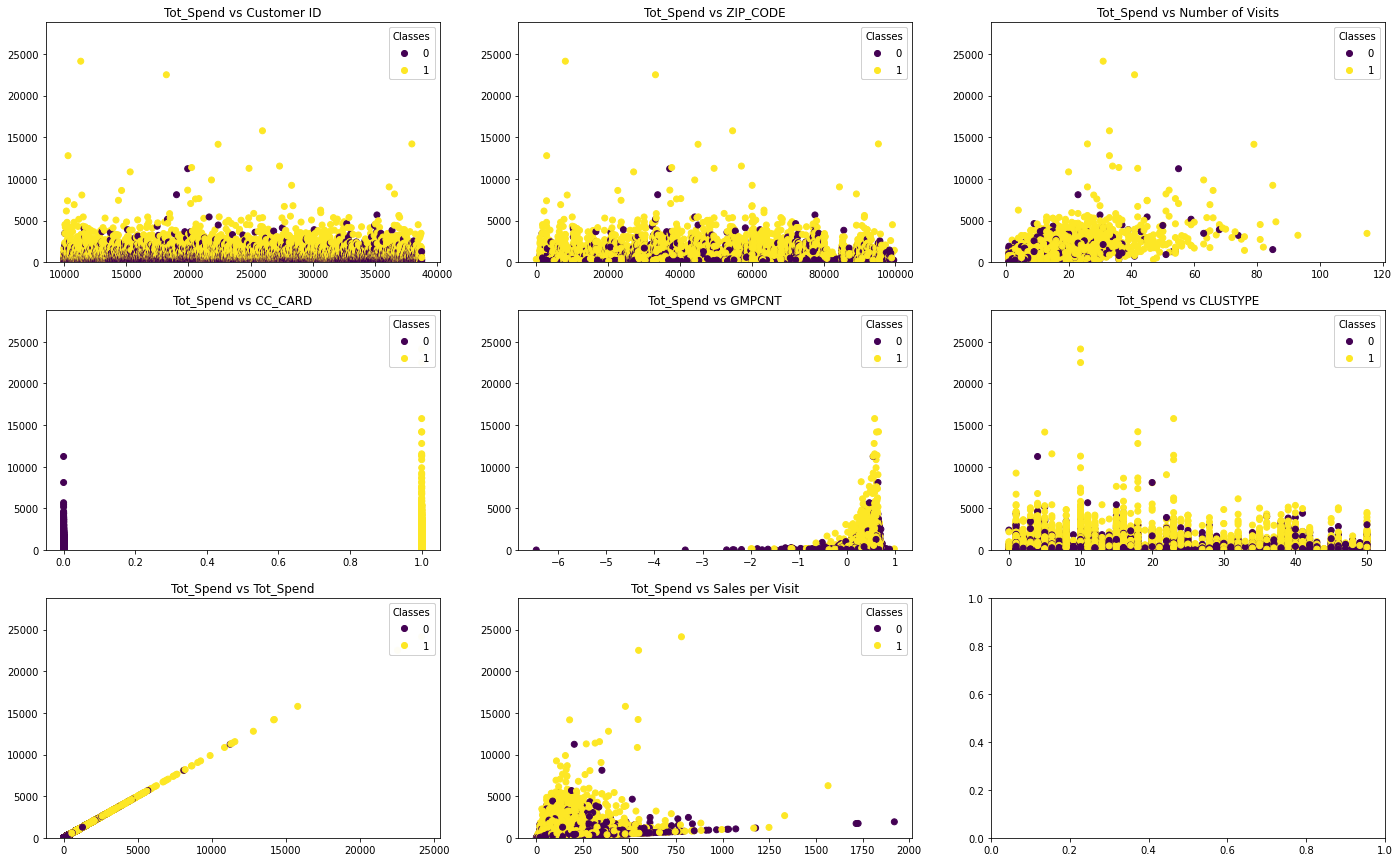

In [121]:
df_scatter_plots(df, 'Tot_Spend', 'CC_CARD')